X.shape (200, 2)
y.shape (200,)


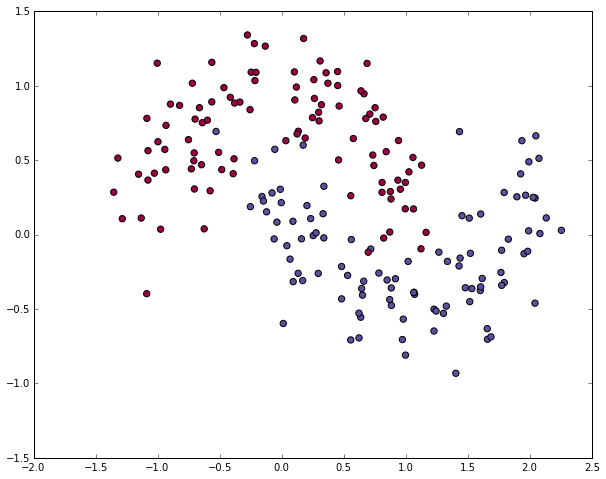

In [2]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
print 'X.shape', X.shape
print 'y.shape', y.shape
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = y.reshape(y.size, 1)


In [3]:
print X.shape
print y.shape

(200, 2)
(200, 1)


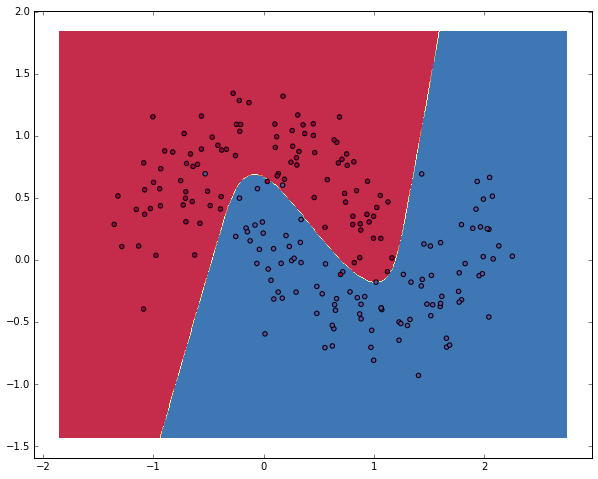

In [262]:
# input layer:  2
# hidden layer: 4
# output layer: 1

rand = np.random.RandomState(1)
theta1 = 1 * np.abs(rand.rand(2, 4))
bias1 = np.zeros((1,4))
theta2 = 1 * np.abs(rand.rand(4, 1))
bias2 = np.zeros((1,1))
# theta3 = 1 * np.abs(rand.rand(2, 1))
# theta1 = 1 * rand.rand(2, 4)
# theta2 = 1 * rand.rand(4, 1)

# theta2 = 1 * rand.rand(6, 3)
# theta3 = 1 * rand.rand(3, 1)

thetas = [theta1, theta2]
biases = [bias1, bias2]

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def dsigmoid(z):
    return z * (1 - z)
#     return sigmoid(z) * (1 - sigmoid(z))

def forward_propagation(X, thetas, biases):
    a = X
    for i, theta in enumerate(thetas):
#         print 'a', a
#         print 'theta', theta
        bias = biases[i]
        z = np.dot(a, theta) + bias
        a = sigmoid(z)
    return a

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

def compute_cost(X, thetas, biases, reg_lambda):
    m = X.shape[0]
    h = forward_propagation(X, thetas, biases)
    
#     print 'h', h
    
    e1 = np.dot(y.T, np.log(h))
    e2 = np.dot((1-y.T), np.log(1-h))
    
#     print 'e1', e1
#     print 'e2', e2
    
    errors = (e1 + e2).sum()
    
    theta_sum = 0
    for theta in thetas:
        t = np.power(theta, 2).sum()
        theta_sum += t
#     print 'theta_sum', theta_sum
    reg = (reg_lambda/(2.0*m)) * theta_sum
#     print 'errors', errors
    probs = -((1.0/m) * errors) + reg

#     probs[probs > 0.5] = 1
#     probs[probs <= 0.5] = 0
    return probs
    
    
def predict(X, thetas, biases):
    probs = forward_propagation(X, thetas, biases)
#     print probs
    probs[probs > 0.5] = 1
    probs[probs <= 0.5] = 0
    return probs

def compute_gradient(X, y, thetas, biases, reg_lambda):
    m = X.shape[0]
    a = X
    zs = [None]
    activations = [a]
    for i, theta in enumerate(thetas):
        bias = biases[i]
#         bias = theta[0:1]
#         weights = theta[1:]
        z = np.dot(a, theta) + bias
#         z = np.dot(a, theta)
        zs.append(z)
        a = sigmoid(z)
        activations.append(a)

    n = len(activations)
    rng = list(reversed(range(len(thetas))))
    
    l = len(thetas)
    deltas = [None] * l

    probs = activations[l]
#     print 'probs.shape', probs.shape
#     probs = np.argmax(activations[l],axis=1).reshape(m,1)
#     activations[l] = probs
#     print 'probs2.shape', probs2.shape

#     probs[probs > 0.5] = 1
#     probs[probs <= 0.5] = 0
#     activations[l] = probs

    dlta = probs - y
    
    
    deltas[l-1] = dlta
    for i in range(l-1-1,0-1,-1):
        theta = thetas[i+1]
        activation = activations[i+1]
        dlta = np.dot(deltas[i+1], theta.T) * dsigmoid(activation)
        deltas[i] = dlta

    bias_gradients = []
    for i, dlta in enumerate(deltas):
        bias_gradient = np.sum(dlta, axis=0, keepdims=True)
        bias_gradients.append(bias_gradient)
        
#     print 'bias_gradients', np.array([bias_gradients[0], bias_gradients[1]])
    theta_gradients = []
    
    for i, dlta in enumerate(deltas):
        activation = activations[i]
        theta = thetas[i]
        theta_gradient = np.dot(activation.T, dlta) + reg_lambda * theta
        theta_gradients.append(theta_gradient)
    
#     print 'theta_gradients', np.array(theta_gradients)
    
    
#     delta = a - y
#     a = activations[1]
#     theta_gradient = np.dot(a.T, delta)
    
#     theta = thetas[1]
#     delta = np.dot(delta, theta.T) * dsigmoid(a)
#     a = activations[0]
#     theta_gradient = np.dot(a.T, delta)
#     print 'bias_gradients1', bias_gradients
#     print 'theta_gradients1', theta_gradients
    return np.array(theta_gradients), bias_gradients


costs = []
alpha = 0.01
reg_lambda = 0.01
for i in range(4000):
    cost = compute_cost(X, thetas, biases, reg_lambda)
    costs.append(cost)
    theta_gradients, bias_gradients = compute_gradient(X, y, thetas, biases, reg_lambda)
#     print theta_gradients
#     print 'bias_gradients', bias_gradients
#     print 'thetas', thetas
#     print 'theta_gradients', alpha * theta_gradients
    thetas -= alpha * theta_gradients
#     print 'bbb', biases - (alpha * bias_gradients)
#     biases -= alpha * bias_gradients
#     print 'bias_gradients', bias_gradients
    bias1 = biases[0] - alpha * bias_gradients[0]
    bias2 = biases[1] - alpha * bias_gradients[1]
    biases = [bias1, bias2]
#     print 'thetas', thetas
    
# predict(X, thetas)
plot_decision_boundary(lambda X: predict(X, thetas, biases))    



#     predict
# print thetas[0]
# print biases[0][0]

# plt.plot(costs)

# forward_propagation(X, thetas)
# print costs

Loss after iteration 0: 0.822569
Loss after iteration 200: 0.306258
Loss after iteration 400: 0.304685
Loss after iteration 600: 0.303963
Loss after iteration 800: 0.303483
Loss after iteration 1000: 0.303080
Loss after iteration 1200: 0.302684
Loss after iteration 1400: 0.302249
Loss after iteration 1600: 0.301726
Loss after iteration 1800: 0.301029
Loss after iteration 2000: 0.299715
Loss after iteration 2200: 0.269895
Loss after iteration 2400: 0.139709
Loss after iteration 2600: 0.110748
Loss after iteration 2800: 0.098834
Loss after iteration 3000: 0.092943
Loss after iteration 3200: 0.089837
Loss after iteration 3400: 0.088060
Loss after iteration 3600: 0.086955
Loss after iteration 3800: 0.086219


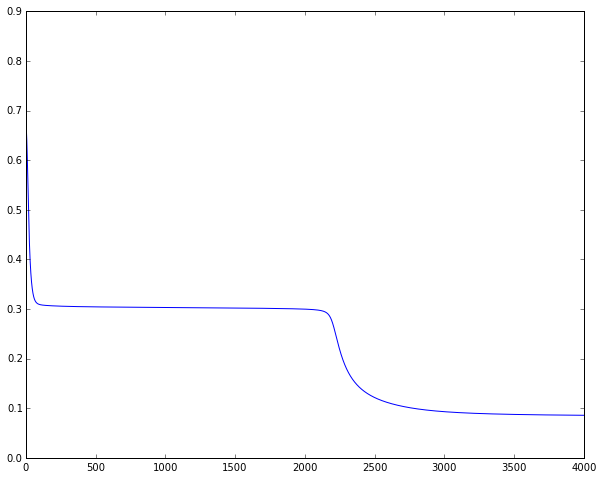

In [266]:


# predicted = predict(X, thetas, biases)
# m = y.shape[0]
# correct = predicted == y

# print correct.sum() / float(m)
plt.plot(costs)

for i, c in enumerate(costs):
    if i % 200 == 0:
        print "Loss after iteration %i: %f" %(i, c)

In [ ]:
def compute_gradient(X, y, w1, b1, w2, b2, alpha, reg_lambda):

  def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

  def dsigmoid(z):
    return (z) * (1 - (z))

  activation = sigmoid

  a1 = X
  z2 = np.dot(a1, w1) + b1
  a2 = activation(z2)
  z3 = np.dot(a2, w2) + b2
  a3 = activation(z3)

  delta3 = a3 - y
#   print 'delta3', delta3

  delta2 = np.dot(delta3, w2.T) *( dsigmoid(a2) )
  # delta1 = np.dot(delta2.T, w1.T) * dsigmoid(a1)

  dW2 = np.dot(a2.T, delta3) + reg_lambda * w2
  dB2 = np.sum(delta3, axis=0, keepdims=True)

  dW1 = np.dot(a1.T, delta2) + reg_lambda * w1
  dB1 = np.sum(delta2, axis=0, keepdims=True)

  return dW1, dW2

In [ ]:
compute_gradient(X, y, thetas[0], 0, thetas[1], 0, 0, 0.05)

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def dsigmoid(z):
    return z * (1 - z)

In [ ]:
i = range(-10, 10, 1)
print i
print (sigmoid(np.array(i)))

# np.arary

plt.plot(sigmoid(np.array(i)))

In [ ]:
plt.plot(dsigmoid(np.array(i)))

In [27]:
range(4,0,-1)

[4, 3, 2, 1]

In [174]:

rand = np.random.RandomState(1)
theta1 = 10  * rand.rand(2, 4)
print theta1

print theta1[0:1]
print theta1[1:]


[[  4.17022005e+00   7.20324493e+00   1.14374817e-03   3.02332573e+00]
 [  1.46755891e+00   9.23385948e-01   1.86260211e+00   3.45560727e+00]]
[[  4.17022005e+00   7.20324493e+00   1.14374817e-03   3.02332573e+00]]
[[ 1.46755891  0.92338595  1.86260211  3.45560727]]


# 